In [1]:
import pandas as pd
import numpy as np 

data = pd.read_csv('train (2).csv')
data.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [2]:
data.id.nunique(), data.shape

#use this data frame later as y

(7381, (7381, 3))

In [3]:
data.fault_severity.unique()

array([1, 0, 2])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [3]:
data_event = pd.read_csv('event_type.csv')
data_event.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [4]:
data_log = pd.read_csv('log_feature.csv')
data_log.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [5]:
data_resource = pd.read_csv('resource_type.csv')
data_resource.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [6]:
data_severity = pd.read_csv('severity_type.csv')
data_severity.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [7]:
dfs = [data, data_event, data_log, data_resource, data_severity]

In [8]:
df = reduce(lambda left,right: pd.merge(left,right,on='id',how="inner"), dfs)

In [9]:
df.shape

(61839, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
id                61839 non-null int64
location          61839 non-null object
fault_severity    61839 non-null int64
event_type        61839 non-null object
log_feature       61839 non-null object
volume            61839 non-null int64
resource_type     61839 non-null object
severity_type     61839 non-null object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [11]:
df['location'] = df['location'].map(lambda x: x.lstrip('location'))

In [12]:
df['event_type'] = df['event_type'].map(lambda x: x.lstrip('event_type'))

In [13]:
df['log_feature'] = df['log_feature'].map(lambda x: x.lstrip('feature'))

In [14]:
df['resource_type'] = df['resource_type'].map(lambda x: x.lstrip('resource_type'))

In [15]:
df['severity_type'] = df['severity_type'].map(lambda x: x.lstrip('severity_type'))

In [16]:
df.head(10)

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,118,1,34,312,19,2,2
1,14121,118,1,34,232,19,2,2
2,14121,118,1,35,312,19,2,2
3,14121,118,1,35,232,19,2,2
4,9320,91,0,34,315,200,2,2
5,9320,91,0,34,235,116,2,2
6,9320,91,0,35,315,200,2,2
7,9320,91,0,35,235,116,2,2
8,14394,152,1,35,221,1,2,2
9,14394,152,1,35,301,1,2,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
id                61839 non-null int64
location          61839 non-null object
fault_severity    61839 non-null int64
event_type        61839 non-null object
log_feature       61839 non-null object
volume            61839 non-null int64
resource_type     61839 non-null object
severity_type     61839 non-null object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [18]:
df.groupby(df['id']).sum()

,fault_severity,volume
id,,
1,12,20
5,0,34
6,2,2
8,0,32
13,0,4
19,8,14
20,0,18
23,0,12
24,0,2


In [24]:
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

{'boxes': [<matplotlib.lines.Line2D at 0x11492fdd0>],
 'caps': [<matplotlib.lines.Line2D at 0x1149e9ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x114a04210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1149f8b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11492fed0>,
  <matplotlib.lines.Line2D at 0x1149e9890>]}

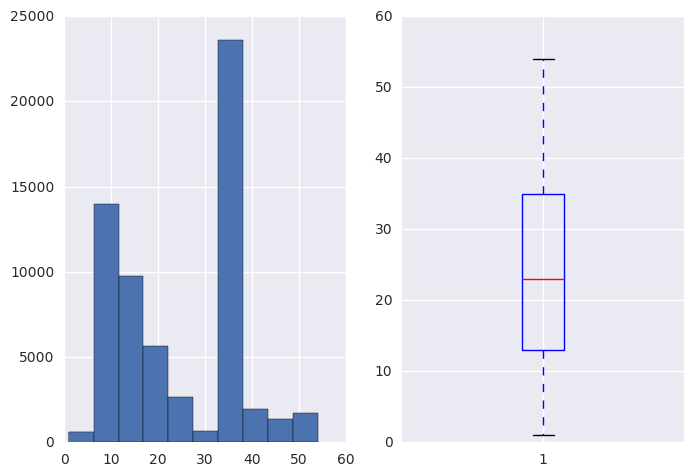

In [25]:
#convert event_type to integer because it is string (categorical value)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(df.event_type.astype(int))
ax2.boxplot(df.event_type.astype(int))

(array([  6.00000000e+00,   9.50000000e+01,   7.20000000e+01,
          0.00000000e+00,   6.02000000e+02,   6.58000000e+02,
          2.28490000e+04,   7.88900000e+03,   2.45900000e+04,
          5.07800000e+03]),
 array([ 0.        ,  0.3988984 ,  0.79779681,  1.19669521,  1.59559362,
         1.99449202,  2.39339043,  2.79228883,  3.19118724,  3.59008564,
         3.98898405]),
 <a list of 10 Patch objects>)

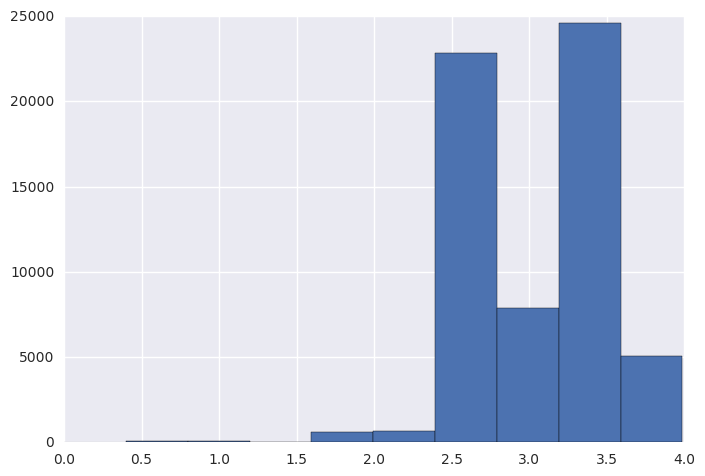

In [26]:
plt.hist(np.log(df.event_type.astype(int)))

In [19]:
from patsy import dmatrices

#create the dummy variables using dmatrices
#y is the first one

y, X = dmatrices('fault_severity ~ C(event_type) + C(log_feature) + C(resource_type) + C(severity_type) + C(location) + volume + id', df, return_type = 'dataframe')

In [20]:
X.shape, y.shape

((61839, 1322), (61839, 1))

In [21]:
X.head(20)

,Intercept,C(event_type)[T. 10],C(event_type)[T. 11],C(event_type)[T. 12],C(event_type)[T. 13],C(event_type)[T. 14],C(event_type)[T. 15],C(event_type)[T. 18],C(event_type)[T. 19],C(event_type)[T. 2],...,C(location)[T. 99],C(location)[T. 990],C(location)[T. 991],C(location)[T. 994],C(location)[T. 995],C(location)[T. 996],C(location)[T. 998],C(location)[T. 999],volume,id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,14121.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,14121.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,14121.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,14121.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,9320.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,9320.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,9320.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,9320.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14394.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14394.0


In [22]:
X = X.groupby(['id']).sum()

In [23]:
X

,Intercept,C(event_type)[T. 10],C(event_type)[T. 11],C(event_type)[T. 12],C(event_type)[T. 13],C(event_type)[T. 14],C(event_type)[T. 15],C(event_type)[T. 18],C(event_type)[T. 19],C(event_type)[T. 2],...,C(location)[T. 989],C(location)[T. 99],C(location)[T. 990],C(location)[T. 991],C(location)[T. 994],C(location)[T. 995],C(location)[T. 996],C(location)[T. 998],C(location)[T. 999],volume
id,,,,,,,,,,,,,,,,,,,,,
1.0,12.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
13.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
19.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
20.0,18.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
23.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
X.shape

(7381, 1321)

In [25]:
#data is the 1st data frame we used first- id, location, fault_severity

y = data.groupby(['id']).sum()

In [26]:
y.head()

,fault_severity
id,
1,1
5,0
6,1
8,0
13,0


In [27]:
y.shape

(7381, 1)

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
#1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.70293453724604971

In [38]:
y_pred_fault = logreg.predict(X_test)

In [39]:
y_predproba = logreg.predict_proba(X_test)
print y_predproba

[[  9.85869192e-01   1.41308081e-02   7.94362057e-11]
 [  5.96360126e-01   3.12019611e-01   9.16202630e-02]
 [  9.97941414e-01   2.05858457e-03   1.06764049e-09]
 ..., 
 [  1.05112554e-01   4.13608189e-01   4.81279256e-01]
 [  4.51265336e-01   2.84598665e-01   2.64135999e-01]
 [  6.49274161e-01   2.59616514e-01   9.11093249e-02]]


In [40]:
from sklearn import metrics

print metrics.accuracy_score(y_pred_fault, y_test)

0.702934537246


In [28]:
# Drop Intercept column to fit different models
X = X.drop(['Intercept'], axis = 1)

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
#2. Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':100, 'max_depth':1,
          'min_samples_leaf':1, 'random_state':42}

rfc = RandomForestClassifier(**params)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.64469525959367946

In [44]:
y_pred_fault = rfc.predict(X_test)

In [45]:
print metrics.accuracy_score(y_test, y_pred_fault)
#from sklearn.metrics import precision_score, f1_score
#precision_score(y_test, y_pred_fault)

0.644695259594


In [46]:
y_predproba = rfc.predict_proba(X_test)
print y_predproba

[[ 0.70312338  0.22040122  0.0764754 ]
 [ 0.63025641  0.26107511  0.10866849]
 [ 0.70243507  0.22515068  0.07241425]
 ..., 
 [ 0.61594853  0.25819498  0.12585649]
 [ 0.61268628  0.2639931   0.12332062]
 [ 0.61222844  0.28146485  0.10630671]]


In [46]:
#3. AdaBoosted Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

adt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.1)
adt.fit(X_train,y_train)
adt.score(X_test, y_test)

0.69480812641083523

In [48]:
y_pred_fault = adt.predict(X_test)

In [49]:
from sklearn import metrics
print metrics.accuracy_score(y_pred_fault, y_test)

0.694808126411


In [50]:
y_predproba = adt.predict_proba(X_test)
print y_predproba

[[ 0.47709128  0.42602026  0.09688847]
 [ 0.37033931  0.34713221  0.28252848]
 [ 0.47698125  0.43085598  0.09216277]
 ..., 
 [ 0.32485272  0.32134126  0.35380603]
 [ 0.32982007  0.33339942  0.33678051]
 [ 0.35914428  0.35255183  0.28830389]]


In [51]:
#4. Gaussian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.49119638826185102

In [52]:
y_pred_fault = gnb.predict(X_test)

In [53]:
print metrics.accuracy_score(y_test, y_pred_fault)

0.491196388262


In [54]:
y_predproba = gnb.predict_proba(X_test)
print y_predproba

[[  1.00000000e+000   6.13989151e-209   0.00000000e+000]
 [  1.19093485e-210   1.00000000e+000   0.00000000e+000]
 [  1.00000000e+000   0.00000000e+000   0.00000000e+000]
 ..., 
 [  0.00000000e+000   0.00000000e+000   1.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   1.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   1.00000000e+000]]


In [56]:
#5. Gradient boosting 

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators':100, 'max_depth':1,
          'learning_rate':0.1, 'min_samples_leaf':1, 'random_state':42}

gbc = GradientBoostingClassifier(**params)

gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.72189616252821676

In [31]:
y_pred_fault = gbc.predict(X_test)

In [32]:
y_pred_fault

array([0, 0, 0, ..., 2, 1, 1])

In [33]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_fault)

0.721896162528


In [43]:
y_test.head()

,fault_severity
id,
15888,0
11330,0
5052,0
10422,0
15939,0


In [44]:
y_test.shape, y_pred_fault.shape

((2215, 1), (2215,))

In [45]:
#1nd method:
y_test['Predicted fault'] = y_pred_fault

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [46]:
y_test.head()

,fault_severity,Predicted fault
id,,
15888,0,0
11330,0,0
5052,0,0
10422,0,0
15939,0,0


In [ ]:
#2nd method:
#predi = y_test.assign(Prediction=y_pred_fault)
#predi.head(20)

In [60]:
#choose Gradient boosting to predict probability function because it has
 #the highest accuracy score

In [47]:
y_predproba = gbc.predict_proba(X_test)
print y_predproba

[[ 0.88710838  0.09001805  0.02287357]
 [ 0.6542691   0.30380751  0.04192339]
 [ 0.8608089   0.12307975  0.01611135]
 ..., 
 [ 0.32032322  0.19201741  0.48765937]
 [ 0.31134643  0.35718062  0.33147295]
 [ 0.4389973   0.51575053  0.04525217]]


In [48]:
y_test['Probability_0'] = y_predproba[:,0]
y_test['Probability_1'] = y_predproba[:,1]
y_test['Probability_2'] = y_predproba[:,2]

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [49]:
y_test.head(20)

,fault_severity,Predicted fault,Probability_0,Probability_1,Probability_2
id,,,,,
15888,0,0,0.887108,0.090018,0.022874
11330,0,0,0.654269,0.303808,0.041923
5052,0,0,0.860809,0.123080,0.016111
10422,0,0,0.839051,0.133754,0.027195
15939,0,0,0.600877,0.364985,0.034138
4278,1,2,0.338962,0.286457,0.374582
10796,2,0,0.603132,0.348091,0.048777
14271,1,0,0.515392,0.281974,0.202634
12255,1,0,0.575405,0.378061,0.046534


In [50]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 15888 to 8298
Data columns (total 5 columns):
fault_severity     2215 non-null int64
Predicted fault    2215 non-null int64
Probability_0      2215 non-null float64
Probability_1      2215 non-null float64
Probability_2      2215 non-null float64
dtypes: float64(3), int64(2)
memory usage: 103.8 KB


In [56]:
y_test.to_csv('fault_severity_final.csv', index=False)

In [57]:
#convert csv file to excel file

In [58]:
report = y_test.corr()

In [59]:
y_test.to_excel('fault_severity_final.xlsx')

In [60]:
excel = pd.read_excel ('fault_severity_final.xlsx')

In [ ]:
#based on accuracy_score: 

#1. AdaBoostClassifier = 0.69
#2. random forest classifier = 0.64
#3. logistic regression = 0.70
#4. Gaussian Naive Bayes = 0.49
#5. Gradient boosting classifier = 0.72 ***